In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from math import cos, sin, pi, sqrt, tan, fabs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
from scipy import optimize

from instances.parser import *
from E3PNT.ThreePntEllipse import *
from E3PNT.e3pnt import *
from E3PNT.circumradius import *
from E3PNT.poly_function import *

import time

%matplotlib inline

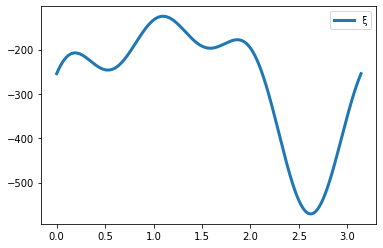

Ellipse: (2.7, 1) and 3 points.
Number of solutions: 0
Avg. running time: 0.014784097671508789


In [7]:
I = parse_input('../instances/CM3.txt')
X=I.X
Y=I.Y
n = len(X)
a = I.a[1]
b = I.b[1]
tot = 0
nit = 0
nsols = 0
tott = 0
a = 2.7
b = 1
X = [-.85, .9, -0.13]
Y = [0, 0.2, -1.72]

#X = [0, .52, 1]
#Y = [0, sqrt(3)/2, 0]

X = list(map(lambda t: t * 2, X))
Y = list(map(lambda t: t * 2, Y))

n = len(X)


for i in range(n):
    for j in range(i+1, n):
        for k in range(j+1, n):
            for deg in [16]:
                #sols = e3pnt(a, b, [X[i], X[j], X[k]], [Y[i], Y[j], Y[k]])
                #nsols += len(sols)

                def ffr(t):
                    return fradius(t, a, b, [0, X[j]-X[i], X[k]-X[i]], [0, Y[j]-Y[i], Y[k]-Y[i]])

                if discard(a, b, [X[i], X[j], X[k]], [Y[i], Y[j], Y[k]]):
                    continue            

                tot += 1
                t1 = time.time()

                cfuns = get_cheb_poly(a, b, [X[i], X[j], X[k]], [Y[i], Y[j], Y[k]], K=1, deg=deg)

                for cfun in cfuns:
                    l = cfun.domain[0]
                    r = cfun.domain[-1]

                    #plt.axvline(x=r)

                    xx, yy = cfun.linspace(1000)

                    roo = list(filter(lambda t: np.isreal(t) and t.real >= l and t.real <= r, cfun.roots()))
                    nsols += len(roo)

                    ro = []



                    for r in roo:
                        #print("Examining the root: ")
                        rx = r.real
                        #for ka in range(0):
                            #ar = ffr(rx)
                            #print(f"niter: {ka}, error: {abs(ar)}")
                            #rx = refine_root(ffr, cfun, r.real, 1)

                        #print(f"niter: {10}, error: {abs(ffr(rx))}")

                        error_1 = 0
                        xc, yc = get_center_from_angle(rx, a, b, [X[i], X[j], X[k]], [Y[i], Y[j], Y[k]])
                        for jj in range(3):
                            error_1 += abs(1 - eval_ellipse(rx, a, b, xc, yc, X[jj], Y[jj]))

                        #print(f"niter: {10}, error1: {abs(ffr(rx))}, error2: {error_1}")


                        ro.append(rx)
                    #print(roo)

                    plt.scatter(roo, cfun(np.array(ro)))


                    #plt.plot(xx, yy, label=f'n={deg}')


                #print(cfun)

                x = np.linspace(0, pi, 2000)
                tott += time.time() - t1

            f1 = np.vectorize(fradius, excluded=[1, 2, 3, 4])
            y1 = f1(x, a, b, [0, X[j]-X[i], X[k]-X[i]], [0, Y[j]-Y[i], Y[k]-Y[i]])

            plt.plot(x, y1, label='\u03BE', lw=3)

                #plt.show()            
plt.legend()
plt.savefig('inexn16.pdf', bbox_inches = 'tight', pad_inches = 0)
plt.show()

print(f"Ellipse: ({a}, {b}) and {len(X)} points.")
print(f"Number of solutions: {nsols}")
print(f"Avg. running time: {tott/tot}")

-------
6
2.924601958012055
2.3113857979709325
1.8774044068154576
1.264188246774335
0.83020685561886
0.21699069557773756


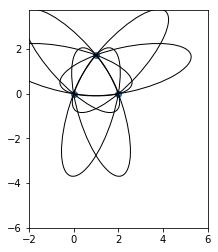

bla (-0.9765497488912973-0.2152918668699425j) -2.9246019580120555 1.0000000000000004
bla (-0.9765497488912975+0.21529186686994267j) 2.924601958012055 1.0000000000000007
bla (-0.6747231003831955-0.7380709571642079j) -2.311385797970932 1.0000000000000009
bla (-0.3018266485081019-0.9533628240341487j) -1.8774044068154585 1.0000000000000002
bla (-0.6747231003831952+0.7380709571642068j) 2.3113857979709325 0.9999999999999998
bla (-0.30182664850810087+0.9533628240341482j) 1.8774044068154576 0.9999999999999994
bla (0.30182664850810154-0.953362824034149j) -1.2641882467743353 1.0000000000000002
bla (0.6747231003831966-0.7380709571642072j) -0.8302068556188599 1.000000000000001
bla (0.301826648508102+0.9533628240341498j) 1.264188246774335 1.0000000000000013
bla (0.6747231003831965+0.7380709571642072j) 0.83020685561886 1.0000000000000009
bla (0.9765497488912971-0.2152918668699419j) -0.2169906955777374 1.0
bla (0.9765497488912973+0.21529186686994212j) 0.21699069557773756 1.0000000000000002
0.00185608

In [7]:
I = parse_input('../instances/CM3.txt')
X=I.X
Y=I.Y
n = len(X)
a = I.a[0]
b = I.b[0]
tot = 0
nit = 0
nsols = 0
tott = 0

X = [0, .5, 1]
Y = [0, sqrt(3)/2, 0]

X = list(map(lambda t: t * 2, X))
Y = list(map(lambda t: t * 2, Y))
a = 3
b = 1
n = len(X)
tavg = 0
nit = 0

for i in range(n):
    for j in range(i+1, n):
        for k in range(j+1, n):
            
            t1 = time.time()
            
            sols = e3pnt(a, b, [X[i], X[j], X[k]], [Y[i], Y[j], Y[k]])
            nit+=1
            tavg += time.time() - t1
            
            if len(sols) == 0:
                continue
            fig = plt.figure()
            ax = fig.add_subplot(111, aspect='equal')
            
                
            plt.scatter([X[i], X[j], X[k]], [Y[i], Y[j], Y[k]])
            xmin = min([X[i], X[j], X[k]])
            xmax = max([X[i], X[j], X[k]])
            ymin = min([Y[i], Y[j], Y[k]])
            ymax = max([Y[i], Y[j], Y[k]])
            
            print("-------")
            print(len(sols))
            for s in sols:
                xc, yc, theta = s
                print(theta)
                #print(theta/pi * 180)
                
                ax.add_artist(mp.patches.Ellipse([xc, yc], a * 2, b * 2, fill=False, angle=theta/pi * 180))
                
            ax.set_xlim(xmin-2, xmax+4)
            ax.set_ylim(ymin-6, ymax+2)
            plt.show()
            
            e3pnt(a, b, [X[i], X[j], X[k]], [Y[i], Y[j], Y[k]])
            pcoeff = exp_poly_coeff(a, b, X[j]-X[i], X[k]-X[i], Y[j]-Y[i], Y[k]-Y[i])
            roo = np.roots(pcoeff)
            
            for r in roo:
                print("bla", r, np.angle(r), np.absolute(r))
            #roo = list(map(lambda r : -j*np.log(r), roo))
            #roo = np.angle(roo)
            #print(roo)
                
print(tavg / nit)